In [1]:
from imputationLibrary import forwardFilling, randomSampleImputation, meanImputation, movingAverage, splineInterpolation
from imputationLibrary.util import util
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
import random
import numpy as np
warnings.filterwarnings('ignore')

TRAINING_SIZE = 749
TESTING_SIZE=250

files = ['seasonal_and_trend', 'seasonal', 'trend', 'white_noise']

In [2]:
def remove_random_points(df_input, num_missing=200):
    df = df_input.copy()
    missing_places = random.sample(range(df.shape[0]), num_missing)
    for missing_place in missing_places:
        df.iloc[missing_place] = np.nan
    return df

Imputing File  seasonal_and_trend
Forward Filling Imputation


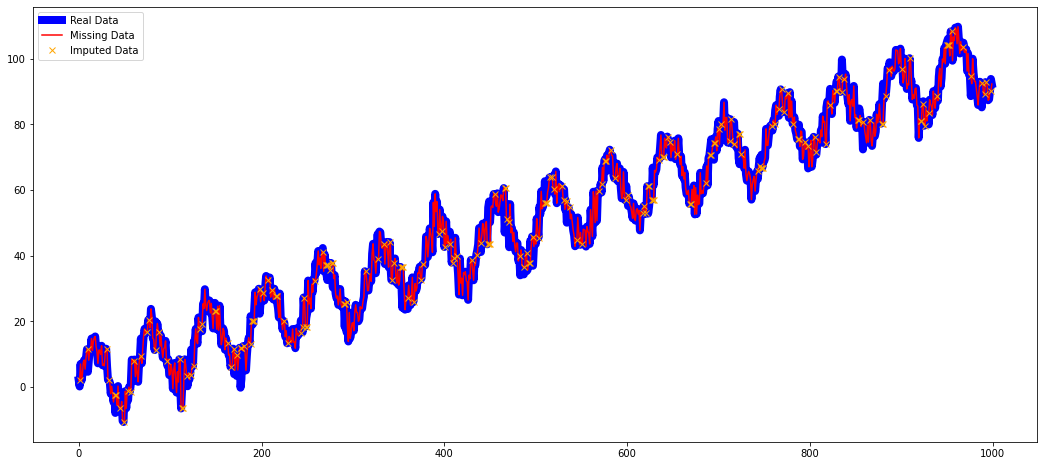

_______________________________________________________________________________________________________________
Random Sample Imputation


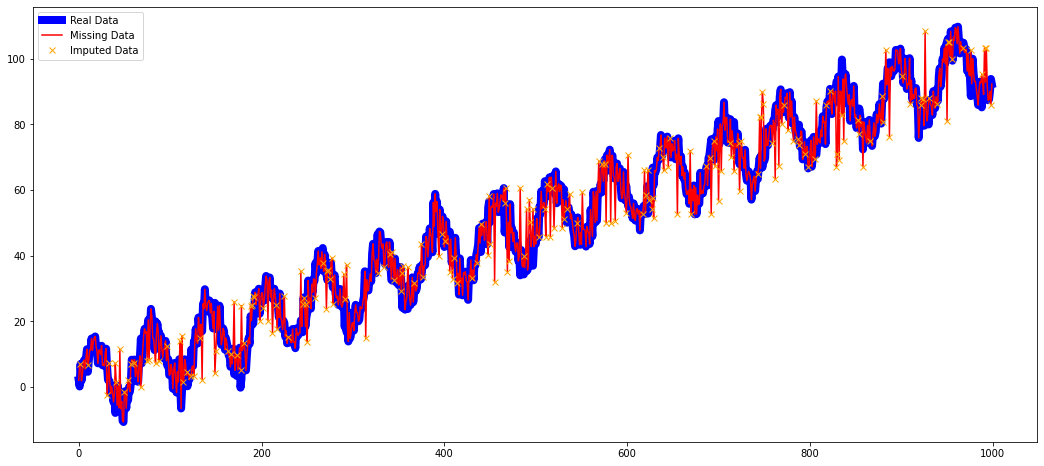

_______________________________________________________________________________________________________________
Mean Imputation


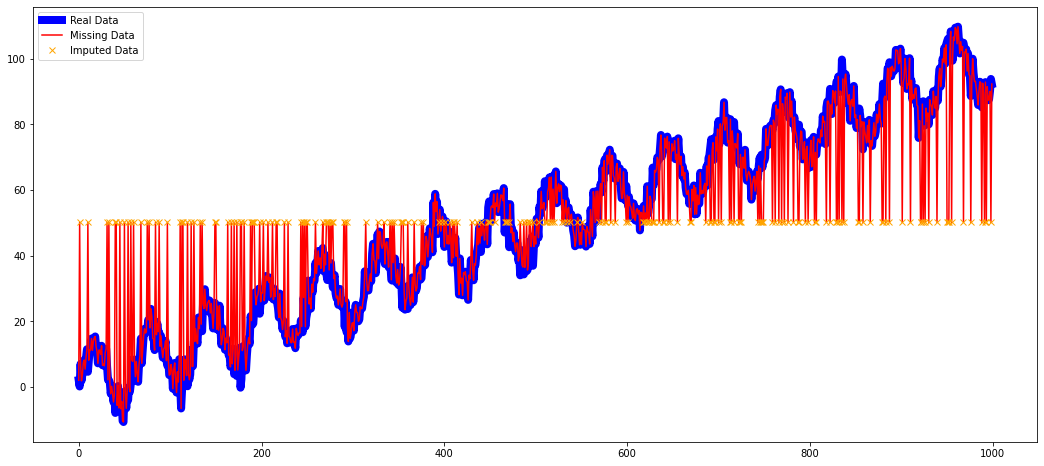

_______________________________________________________________________________________________________________
Moving Average Imputation


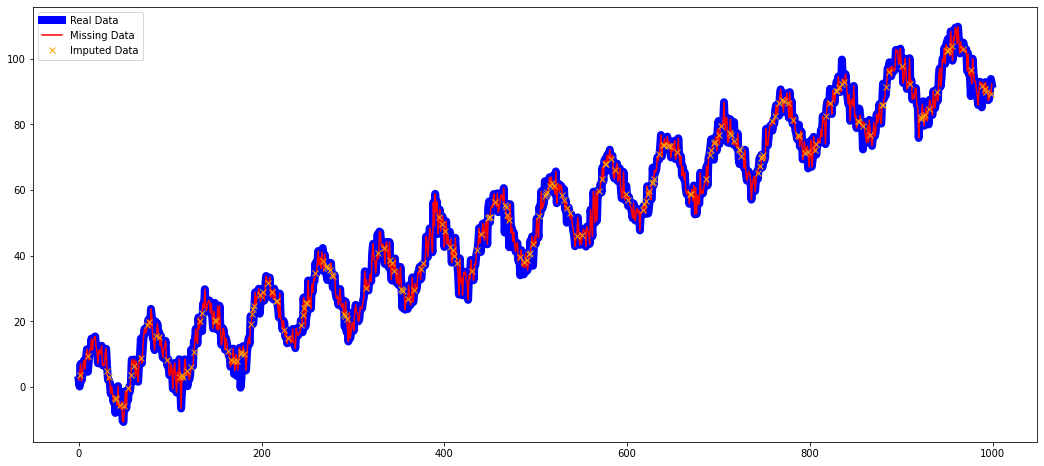

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


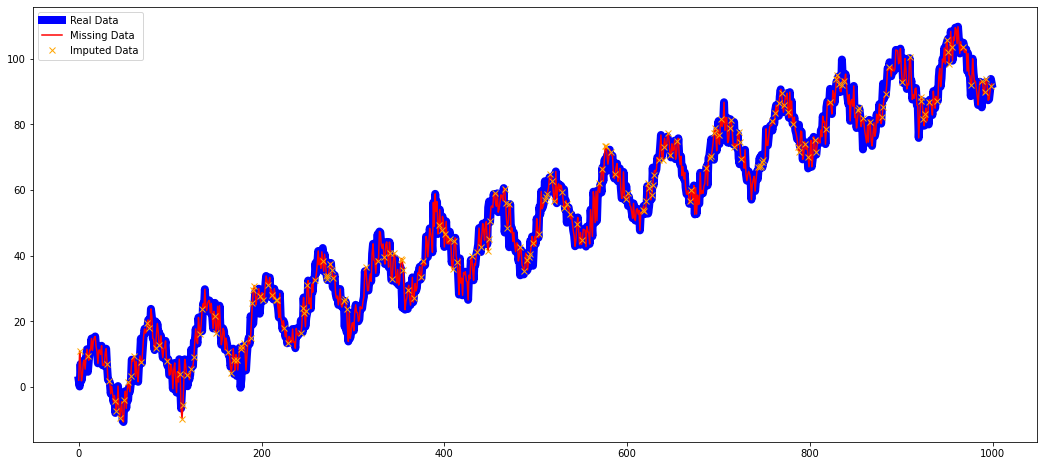

_______________________________________________________________________________________________________________
###############################################################################################################
Imputing File  seasonal
Forward Filling Imputation


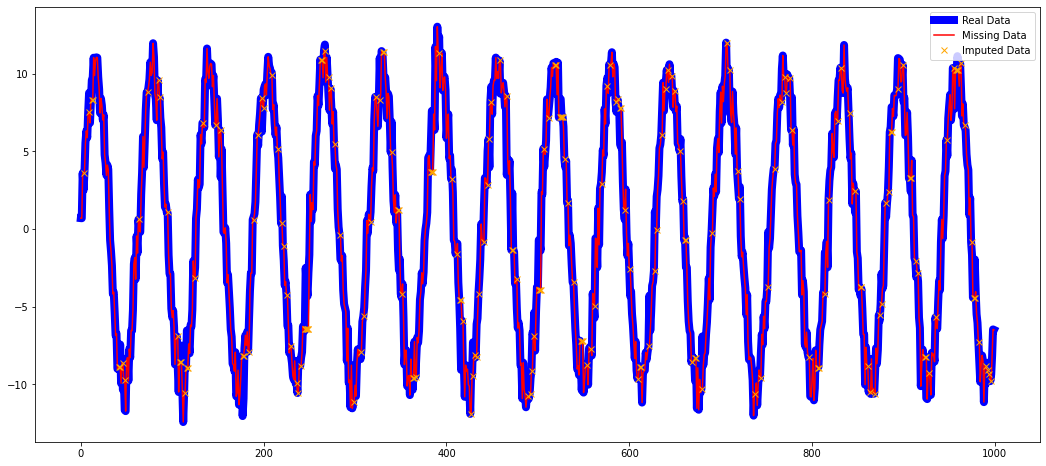

_______________________________________________________________________________________________________________
Random Sample Imputation


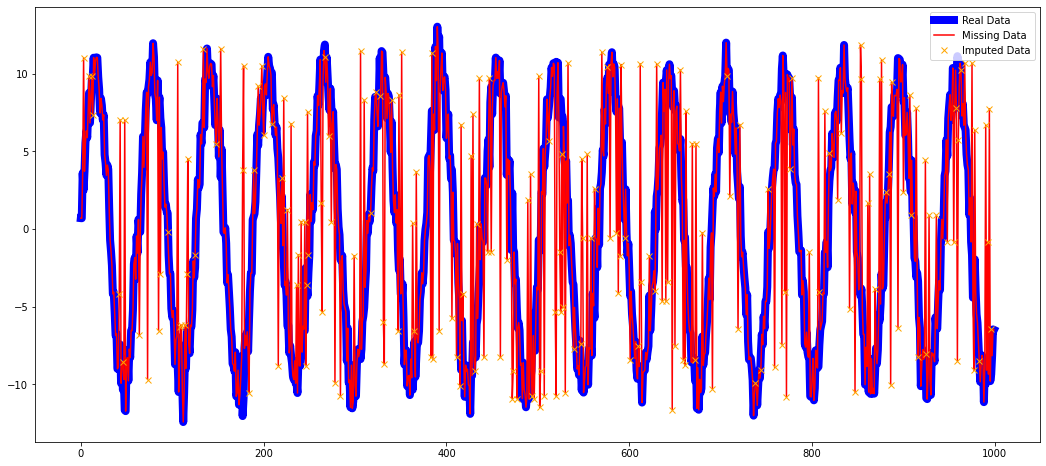

_______________________________________________________________________________________________________________
Mean Imputation


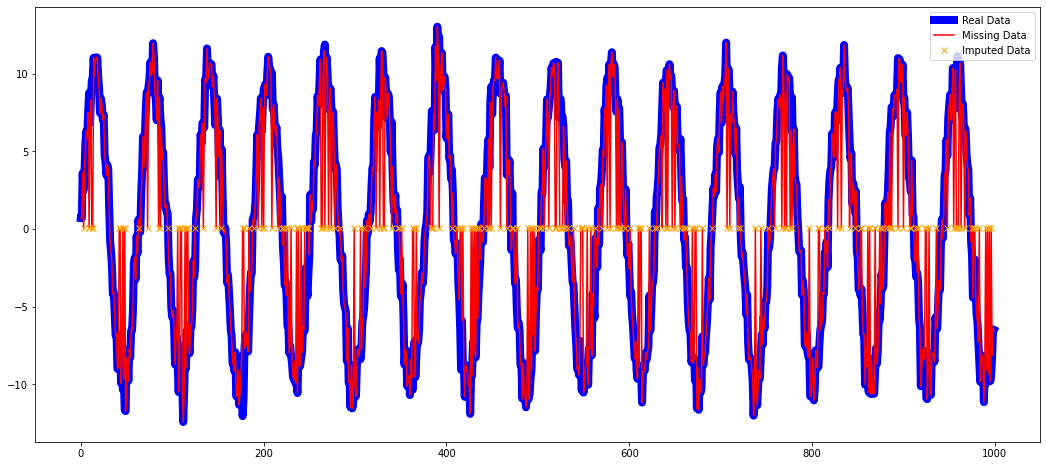

_______________________________________________________________________________________________________________
Moving Average Imputation


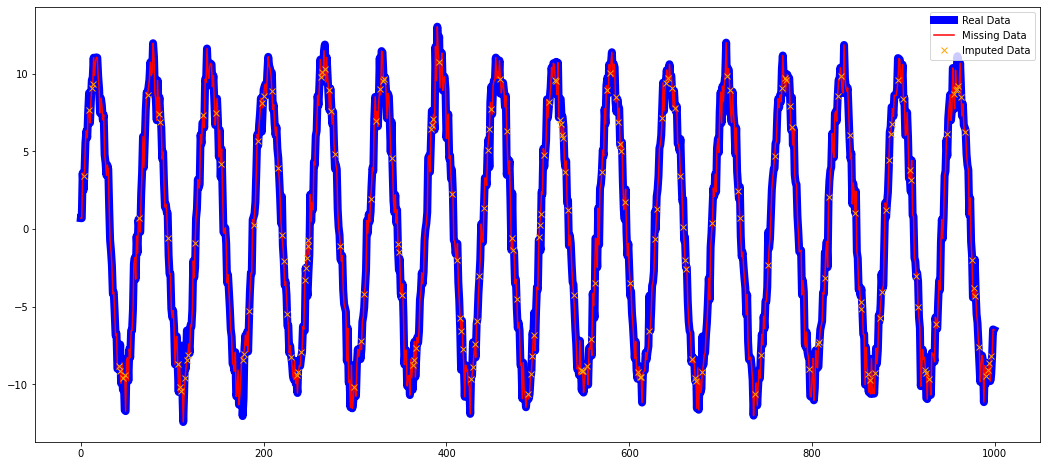

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


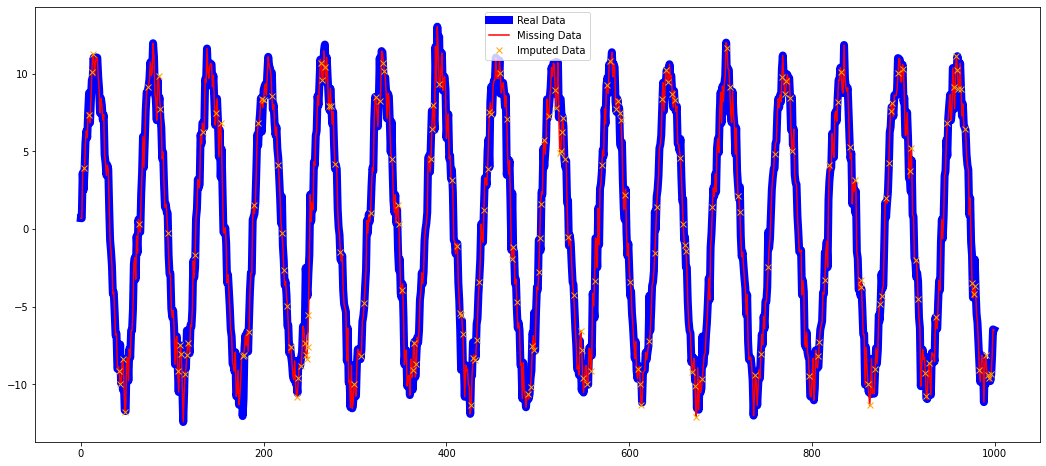

_______________________________________________________________________________________________________________
###############################################################################################################
Imputing File  trend
Forward Filling Imputation


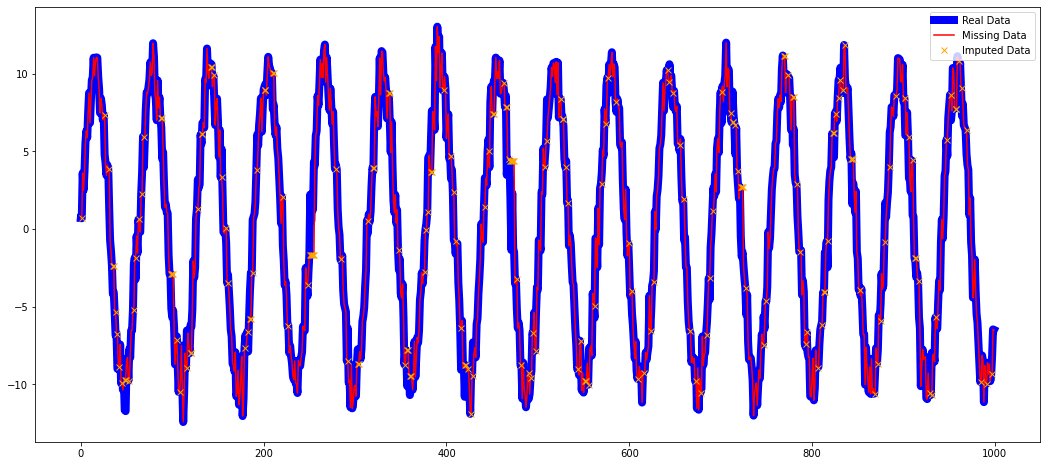

_______________________________________________________________________________________________________________
Random Sample Imputation


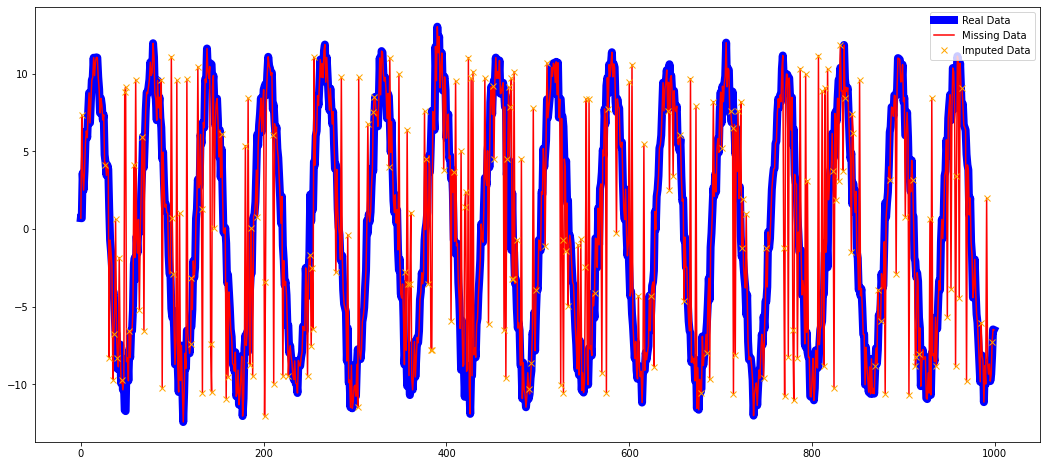

_______________________________________________________________________________________________________________
Mean Imputation


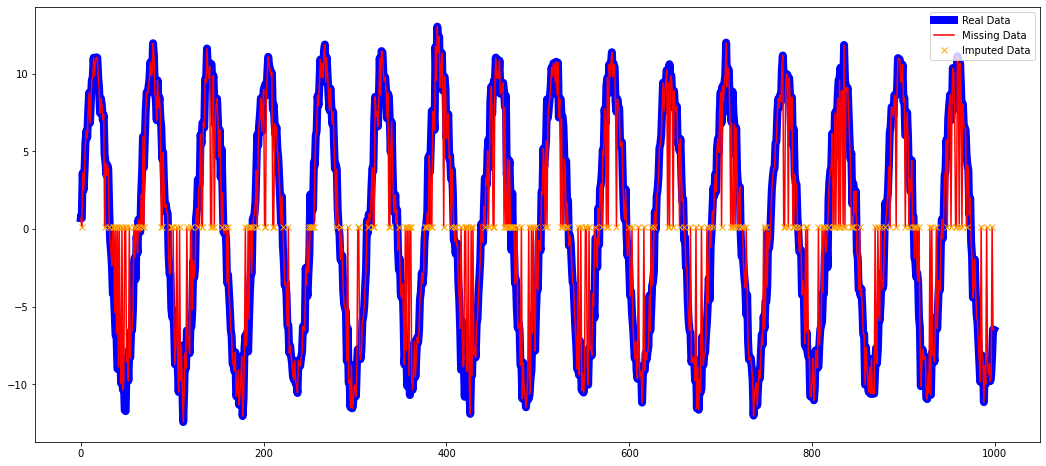

_______________________________________________________________________________________________________________
Moving Average Imputation


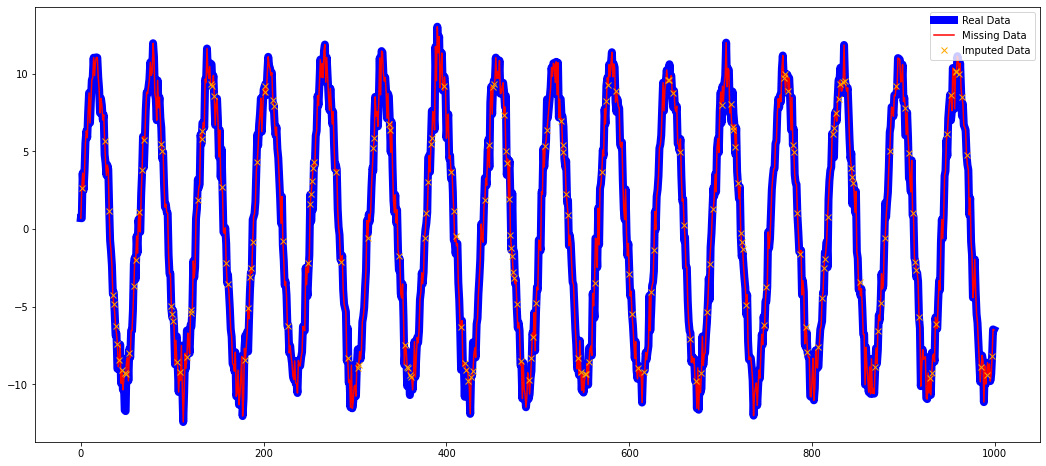

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


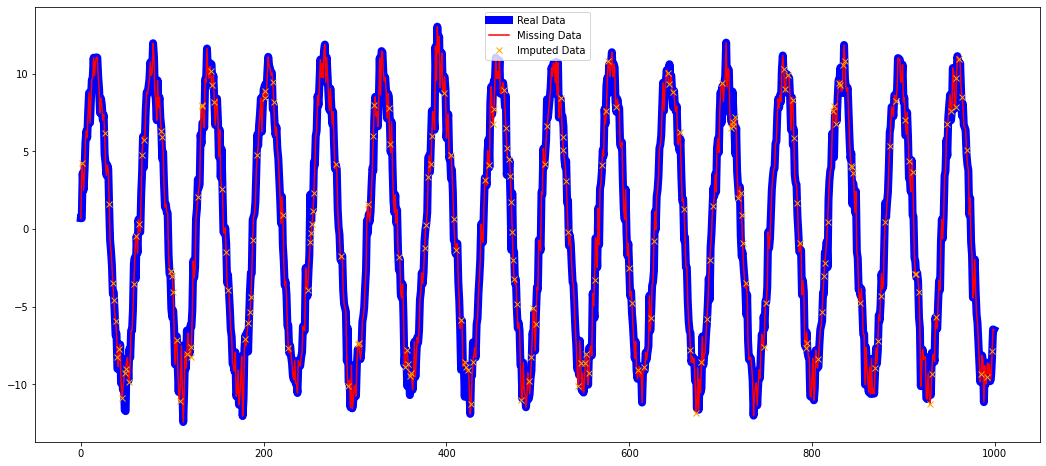

_______________________________________________________________________________________________________________
###############################################################################################################
Imputing File  white_noise
Forward Filling Imputation


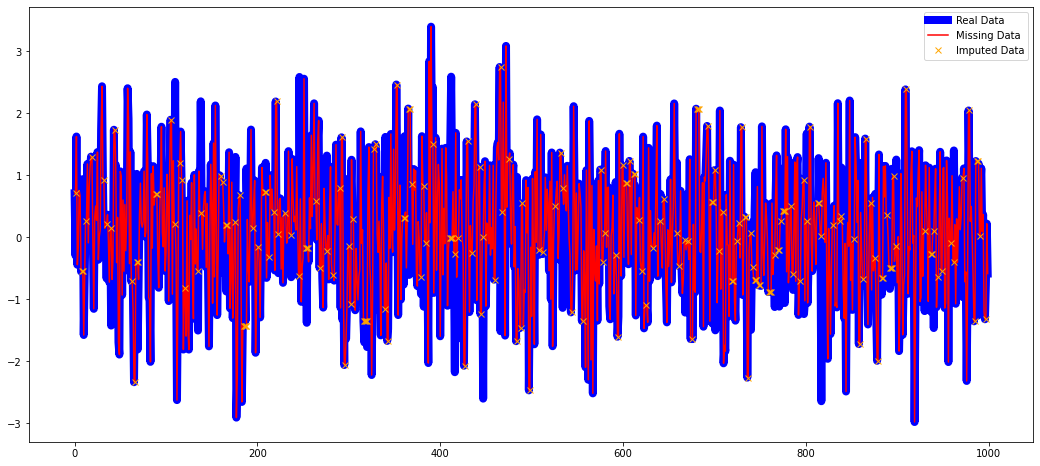

_______________________________________________________________________________________________________________
Random Sample Imputation


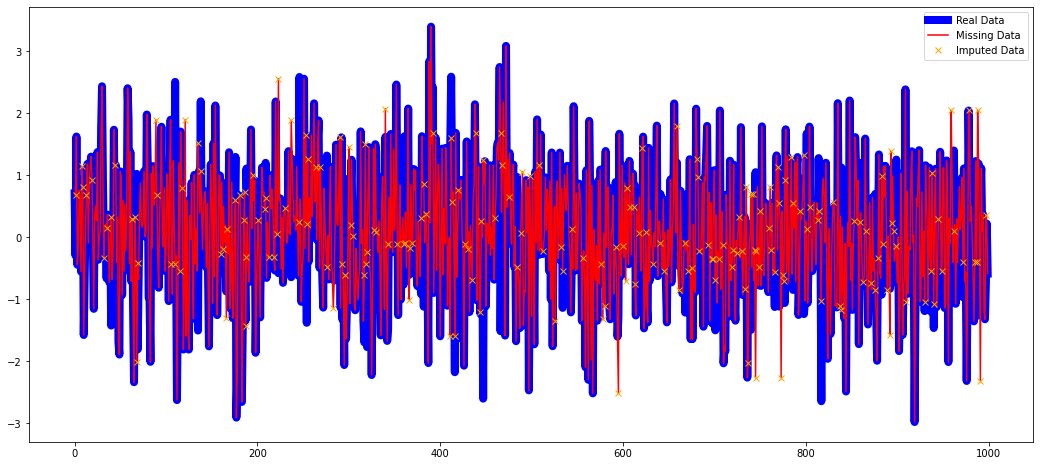

_______________________________________________________________________________________________________________
Mean Imputation


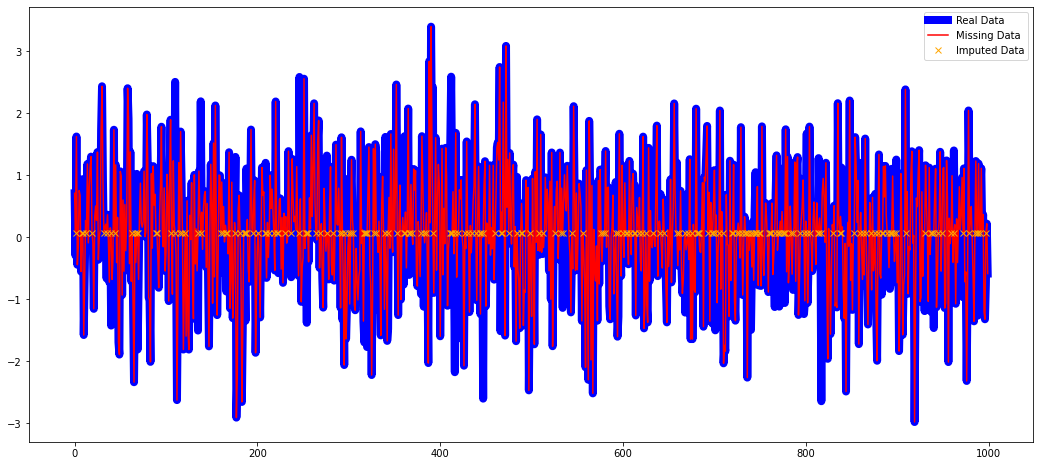

_______________________________________________________________________________________________________________
Moving Average Imputation


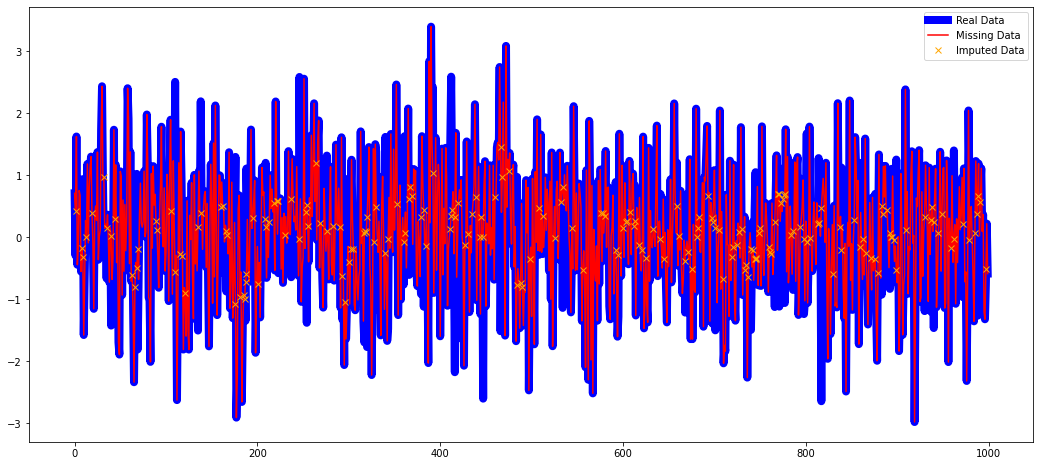

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


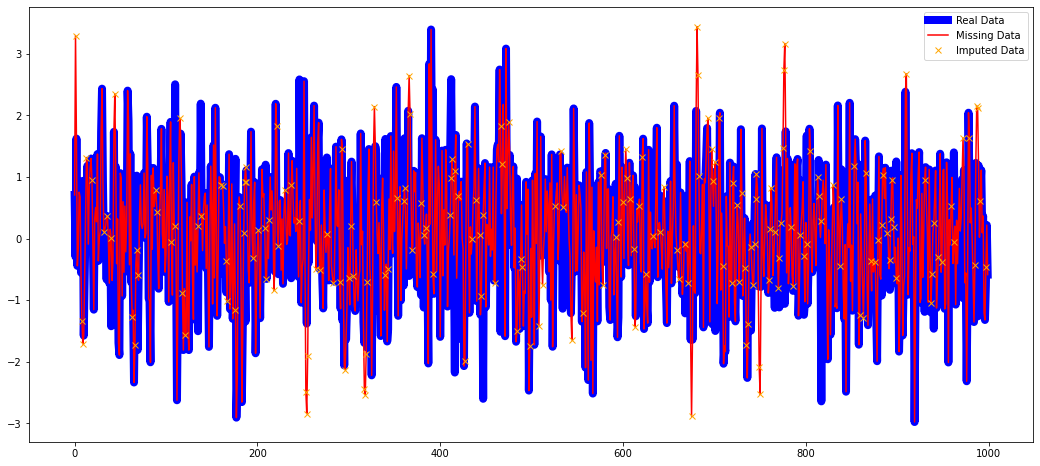

_______________________________________________________________________________________________________________
###############################################################################################################
{'seasonal_and_trend_ff': 5.00357582626317, 'seasonal_and_trend_rs': 25.98770397349619, 'seasonal_and_trend_mi': 172.45104910404433, 'seasonal_and_trend_ma': 2.3202519071327443, 'seasonal_and_trend_si': 5.223834753689522, 'seasonal_ff': 0.5961997062078929, 'seasonal_rs': 20.71710657939044, 'seasonal_mi': 10.621415539525838, 'seasonal_ma': 0.2919015116169159, 'seasonal_si': 0.5441397124164494, 'trend_ff': 0.7541508984205584, 'trend_rs': 19.885735908392054, 'trend_mi': 8.892136952688732, 'trend_ma': 0.29287051887453336, 'trend_si': 0.46673521262188644, 'white_noise_ff': 0.3845832978643204, 'white_noise_rs': 0.3894640449908606, 'white_noise_mi': 0.19588445542954605, 'white_noise_ma': 0.23581047597873536, 'white_noise_si': 0.4958567709152085}


In [3]:
REPETE = 30
dict_rmse = {}
for file in files:
    df_complete = pd.read_csv('output\/'+ file + '_complete.csv', index_col=0)
    df_missing = remove_random_points(df_complete, num_missing=200)
    
    for count in range(REPETE): 
        if count == 0:
            print("Imputing File ", file)

        ##############################################################################################################
        imputed_ff = forwardFilling.inputTrainingData(df_missing)
        rmse = mean_squared_error(imputed_ff, df_complete, squared=True)
        
        if count == 0:
            print("Forward Filling Imputation")
            util.plot(df_complete, df_missing, imputed_ff) 
            dict_rmse[file+'_ff'] = rmse
            print("_______________________________________________________________________________________________________________")
        elif count == REPETE-1:
            dict_rmse[file+'_ff'] += rmse
            dict_rmse[file+'_ff'] = dict_rmse[file+'_ff']/REPETE
        else:
            dict_rmse[file+'_ff'] += rmse
        
        ##############################################################################################################
        for count2 in range(REPETE):
            imputed_rs = randomSampleImputation.inputTrainingData(df_missing, sliding_window_size = 0.03)
            rmse = mean_squared_error(imputed_rs, df_complete, squared=True)
        
            if count == 0 and count2 == 0:
                print("Random Sample Imputation")
                util.plot(df_complete, df_missing, imputed_rs) 
                dict_rmse[file+'_rs'] = rmse
                print("_______________________________________________________________________________________________________________")
            elif count == REPETE-1 and count2 == REPETE-1:
                dict_rmse[file+'_rs'] += rmse
                dict_rmse[file+'_rs'] = dict_rmse[file+'_rs']/(REPETE*REPETE)
            else:
                dict_rmse[file+'_rs'] += rmse
            

        ##############################################################################################################
        imputed_mi = meanImputation.inputTrainingData(df_missing)
        rmse = mean_squared_error(imputed_mi, df_complete, squared=True)
        
        if count == 0:
            print("Mean Imputation")
            util.plot(df_complete, df_missing, imputed_mi) 
            dict_rmse[file+'_mi'] = rmse
            print("_______________________________________________________________________________________________________________")
        elif count == REPETE-1:
            dict_rmse[file+'_mi'] += rmse
            dict_rmse[file+'_mi'] = dict_rmse[file+'_mi']/REPETE
        else:
            dict_rmse[file+'_mi'] += rmse
            
        ##############################################################################################################
        imputed_ma = movingAverage.inputTrainingData(df_missing, 3)
        rmse = mean_squared_error(imputed_ma, df_complete, squared=True)
        
        if count == 0:
            print("Moving Average Imputation")
            util.plot(df_complete, df_missing, imputed_ma) 
            dict_rmse[file+'_ma'] = rmse
            print("_______________________________________________________________________________________________________________")
        elif count == REPETE-1:
            dict_rmse[file+'_ma'] += rmse
            dict_rmse[file+'_ma'] = dict_rmse[file+'_ma']/REPETE
        else:
            dict_rmse[file+'_ma'] += rmse
            
        ##############################################################################################################
        for count2 in range(REPETE):
            imputed_si = splineInterpolation.inputTrainingData(df_missing, derivate_order=2)
            rmse = mean_squared_error(imputed_si, df_complete, squared=True)

            if count == 0 and count2 == 0:
                print("Spline Interpolation Imputation")
                util.plot(df_complete, df_missing, imputed_si) 
                dict_rmse[file+'_si'] = rmse
                print("_______________________________________________________________________________________________________________")
            elif count == REPETE-1 and count2 == REPETE-1:
                dict_rmse[file+'_si'] += rmse
                dict_rmse[file+'_si'] = dict_rmse[file+'_si']/(REPETE*REPETE)
            else:
                dict_rmse[file+'_si'] += rmse
            
    print("###############################################################################################################")
    
print(dict_rmse)    